<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Adult Income Data)

The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**age:** Age of an individual

**workclass:** Working class of the individual

**fnlwgt:** Weights based on the demographic characteristics

**education:** Highest education of the individual

**education.num:** Education encoded with unique numbers

**marital.status:** Marital status of the individual

**occupation:** Occupation of the individual

**relationship:** Relation of the individual in the family

**race:** Race of the individual

**sex:** Gender of the individual (0 = Male, 1 = Female)

**capital.gain:** Gain amount of the individual

**capital.loss:** Loss amount of the individual

**hours.per.week:** Working hours per week

**native.country:** The native country of the individual

**income:** Income of the individual

##  Table of Content

1. **[Understand the Dataset](#data)**
2. **[Measures of Central Tendency](#ct)**
3. **[Measures of Dispersion](#md)**
4. **[Distribution of the Data](#dist)**
5. **[Skewness and kurtosis](#sk)**
6. **[Correlation](#corr)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import statistics
from scipy import stats 
import warnings
warnings.filterwarnings("ignore")

**Load the adults income dataset and print first five observations**

In [2]:
df = pd.read_csv("adult_income.csv")

### Let's begin with some hands-on practice exercises

<a id="data"> </a>
## 1. Understand the Dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  int64 
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex                int64
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [7]:
#Convert Sex to Object Data Type
df['sex'] =df['sex'].astype('object')

In [8]:
#Convert Education Number to Object Data Type
df['education.num'] =df['education.num'].astype('object')

In [9]:
#Validate the conversion of sex and education.num data types
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num     object
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

The data type of 'sex' and 'education.num' is changed to 'object'.

<a id="ct"> </a>
## 2. Measures of Central Tendency

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the average age of males and females in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
#Use groupby to create asubset fo males and females
df.groupby('sex')['age'].mean()

sex
0    39.433547
1    36.858230
Name: age, dtype: float64

The average age of males is more than females.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the value under which 95% of the capital gain would lie? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# Calculate 95% percentile of the capital gain
print("95% percentile of capital gain:", df['capital.gain'].quantile(0.95))

95% percentile of capital gain: 5013.0


From the output, we can infer that 95% of the capital gain is less than 5013.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the qualification of most of the individuals </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
print("Mode of the Education Columns:", df['education'].mode()[0])

Mode of the Education Columns: HS-grad


In [13]:
df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Most of the individuals in the data are high school graduates.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the middle most observation of age for different working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
df.groupby('workclass')['age'].median().sort_values()

workclass
Never-worked        18.0
?                   35.0
Private             35.0
State-gov           39.0
Local-gov           41.0
Federal-gov         43.0
Self-emp-not-inc    44.0
Self-emp-inc        45.0
Without-pay         57.0
Name: age, dtype: float64

The '?' represents the working class is not known. On average, the working hours for self-employed are highest.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Compare the mean and trimmed mean of capital gain and comment on the presence of outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# Get mean of the capital gain 
print("Mean of Capital Gain:", round(df['capital.gain'].mean(),2))

# Trim Mean by removing 0.025% perecent from both the sides
print("Trimmed Mean of Capital Gain:", round(stats.trim_mean(df['capital.gain'], 0.05),2))


Mean of Capital Gain: 1077.65
Trimmed Mean of Capital Gain: 113.81


There is a significant difference in the values of the mean and trimmed mean. This implies the presence of outliers in capital gain.

#### Boxplot of capital gain to detect the outliers

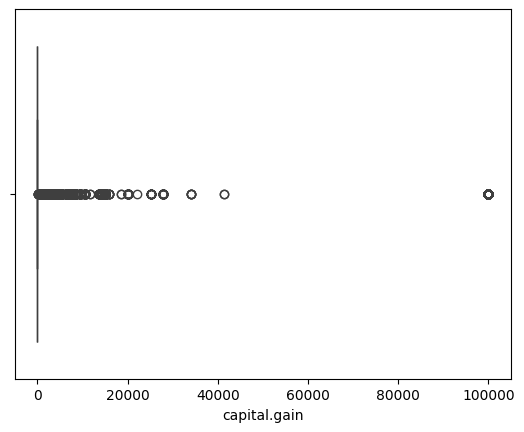

In [16]:
sns.boxplot(data=df , x=df['capital.gain'])
plt.show()

In [17]:
q1= df['capital.gain'].quantile(0.25)
q3= df['capital.gain'].quantile(0.75)
iqr = q3-q1
outlier=df[(df['capital.gain']<(q1-(1.5*iqr))) | (df['capital.gain']>(q3+(1.5*iqr)))]['capital.gain']

lower=df['capital.gain']<q1-(1.5*iqr)
upper=df['capital.gain']>q3+(1.5*iqr)
out=df[lower|upper]['capital.gain']

print("q1", q1)
print("q3", q3)

print(out)

print(list(outlier))



q1 0.0
q3 0.0
1519    99999
1520    99999
1521    99999
1522    99999
1523    99999
        ...  
4226      114
4227      114
4228      114
4229      114
4230      114
Name: capital.gain, Length: 2712, dtype: int64
[99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 

In [18]:
new_df=df[~(lower|upper)]
print(new_df)

       age workclass  fnlwgt     education education.num      marital.status  \
0       90         ?   77053       HS-grad             9             Widowed   
1       82   Private  132870       HS-grad             9             Widowed   
2       66         ?  186061  Some-college            10             Widowed   
3       54   Private  140359       7th-8th             4            Divorced   
4       41   Private  264663  Some-college            10           Separated   
...    ...       ...     ...           ...           ...                 ...   
32556   22   Private  310152  Some-college            10       Never-married   
32557   27   Private  257302    Assoc-acdm            12  Married-civ-spouse   
32558   40   Private  154374       HS-grad             9  Married-civ-spouse   
32559   58   Private  151910       HS-grad             9             Widowed   
32560   22   Private  201490       HS-grad             9       Never-married   

              occupation   relationship

In [19]:
new_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K


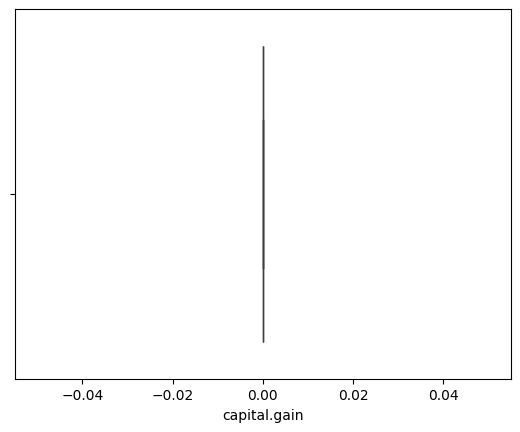

In [20]:
sns.boxplot(data=new_df, x=new_df['capital.gain'])
plt.show()

#### Outlier detection using z-score

In [21]:
#new column of zscores of capital gain 
df['capital.gain.z'] = (df['capital.gain'] - df['capital.gain'].mean())/df['capital.gain'].std()
df.tail(50)

print(df[df['capital.gain']>0]['capital.gain.z'])

print("\nOutlier..")
out = df[(df['capital.gain.z']<-3) | (df['capital.gain.z']>3)]['capital.gain']

print(list(out))

1519    13.394372
1520    13.394372
1521    13.394372
1522    13.394372
1523    13.394372
          ...    
4226    -0.130482
4227    -0.130482
4228    -0.130482
4229    -0.130482
4230    -0.130482
Name: capital.gain.z, Length: 2712, dtype: float64

Outlier..
[99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 99999, 9999

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. What is the percentage of the Asian-Pac-Islander race people in the data? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
#Check the categories of the race
df['race'].unique()

#get the count of people of Asian-Pac-Islander Race
count = len(df[df['race']=='Asian-Pac-Islander'])

#get the total count of the dataset
total = len(df)

pct= count/total*100

print("% of Asian-Pac-Islander = ", round(pct,3))

% of Asian-Pac-Islander =  3.191


There are approximately 3.19% of people of the Asian-Pac-Islander race.

<a id="md"> </a>
## 3. Measures of Dispersion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which occupation has more variability in the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:

#Look at the column names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'capital.gain.z'],
      dtype='object')

In [24]:
#find the all different occupations
df['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [25]:
cv = df.groupby('occupation')['hours.per.week'].std() / df.groupby('occupation')['hours.per.week'].mean()

print(cv)

occupation
?                    0.472058
Adm-clerical         0.255332
Armed-Forces         0.346014
Craft-repair         0.213975
Exec-managerial      0.246937
Farming-fishing      0.368593
Handlers-cleaners    0.278819
Machine-op-inspct    0.186297
Other-service        0.366150
Priv-house-serv      0.492142
Prof-specialty       0.295760
Protective-serv      0.287651
Sales                0.324572
Tech-support         0.268388
Transport-moving     0.284874
Name: hours.per.week, dtype: float64


The variance for the occupation 'farming-fishing' is the highest, which implies that working hours of farmers and fishermen may fluctuate depending upon their work and the season. <br> The '?' denotes the occupation is not known.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 9. What is the range of the middle 50% of working hours per week?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
iqr = stats.iqr(df['hours.per.week'])

print(iqr)

5.0


The middle 50% of the data has a range of 5 working hours.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Are there any variables which can be excluded from further analysis based on their variability?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
for col in df.select_dtypes(exclude='O').columns:
    print(col, df[col].std())


age 13.640432553581343
fnlwgt 105549.97769702224
capital.gain 7385.292084840339
capital.loss 402.96021864899967
hours.per.week 12.358681221616703
capital.gain.z 1.0000000000000002


The standard deviation of none of the variables is near zero. So, we shall consider all the variables for further analysis.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the percentage of variation in work hours for each workclass. Give an appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
cv1 = df.groupby('workclass')['hours.per.week'].std() / df.groupby('workclass')['hours.per.week'].mean()*100

print(cv1.sort_values(ascending=False))

workclass
Without-pay         53.059084
?                   46.711116
Self-emp-not-inc    37.537713
State-gov           29.968071
Self-emp-inc        28.473900
Private             27.954085
Local-gov           26.283120
Federal-gov         21.360037
Never-worked              NaN
Name: hours.per.week, dtype: float64


From the output it is apperent that, the working hours of federal government employees do not have much variation. People without pay have 53% variation in their working hours.

<a id="dist"> </a>
## 4. Distribution of the Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Define a function to plot the categories of the variable and find the category with highest frequency</b>
                </font>
            </div>
        </td>
    </tr>
</table>

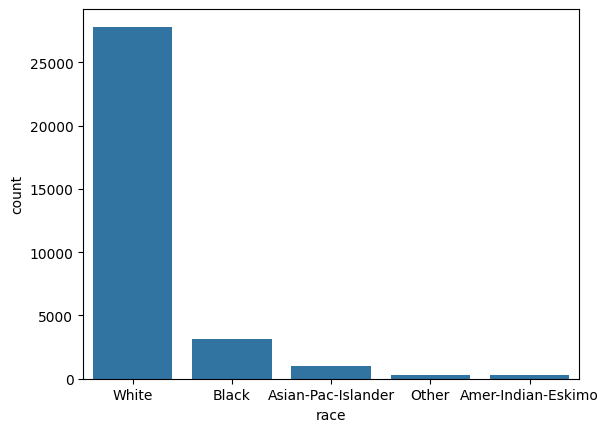

In [29]:
sns.countplot(data=df, x='race')
plt.show()

In [30]:
def catplot(data, feature):
    print("Countplot for the feature {}".format(feature))
    sns.countplot(data=df, x=feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title("Countpolt of a Categorical Variable")
    plt.xticks(rotation=90)
    plt.show()



Countplot for the feature workclass


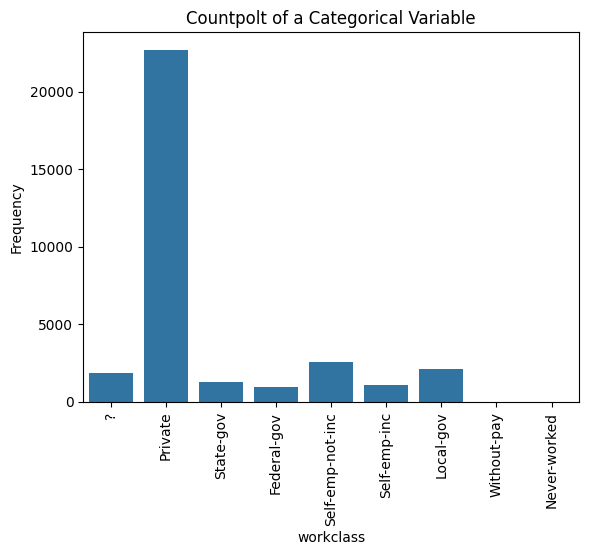

Countplot for the feature education


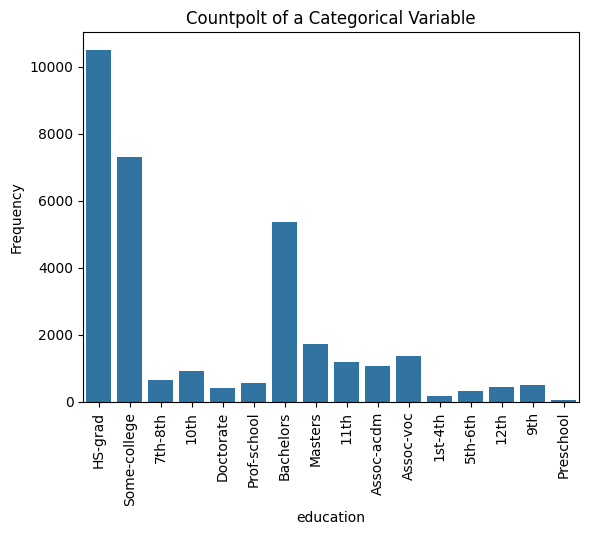

Countplot for the feature education.num


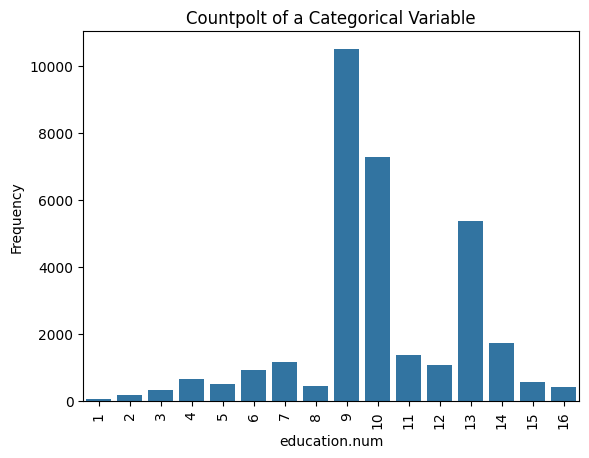

Countplot for the feature marital.status


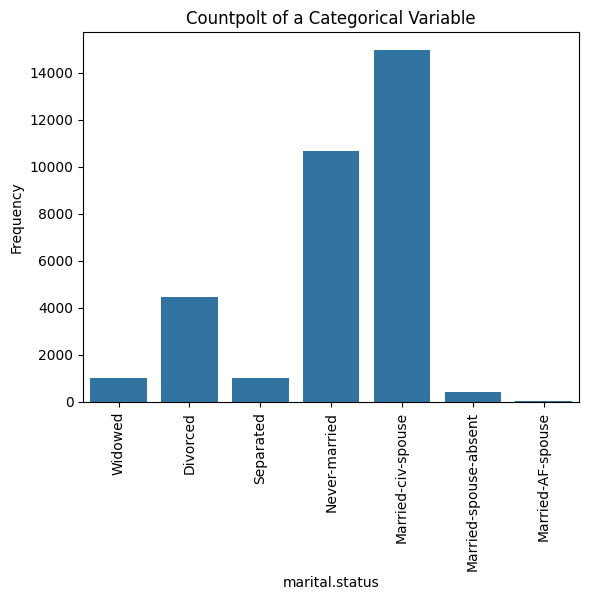

Countplot for the feature occupation


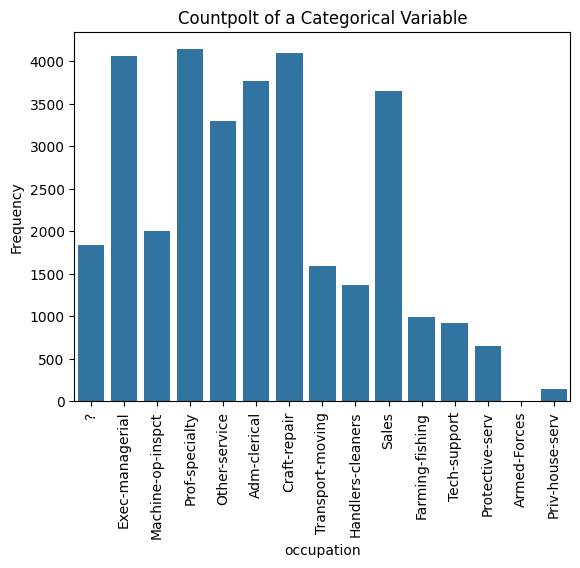

Countplot for the feature relationship


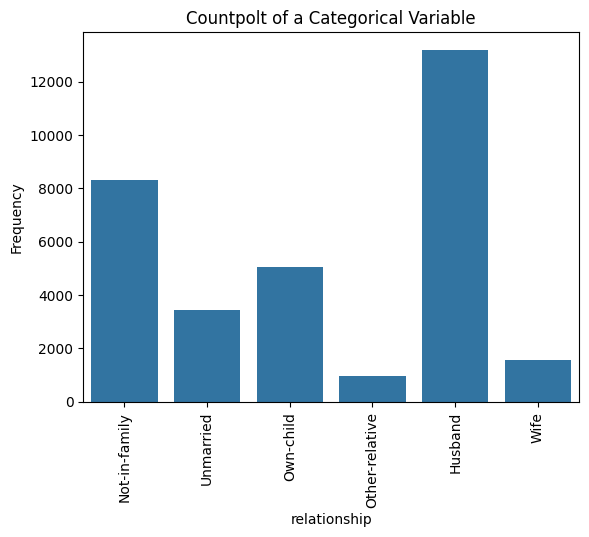

Countplot for the feature race


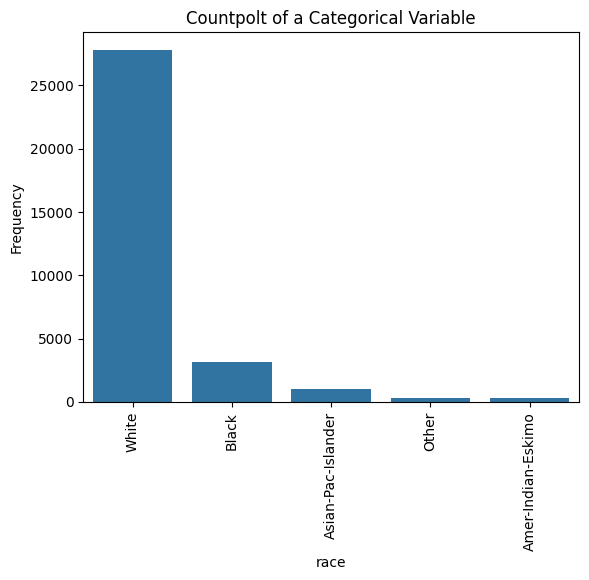

Countplot for the feature sex


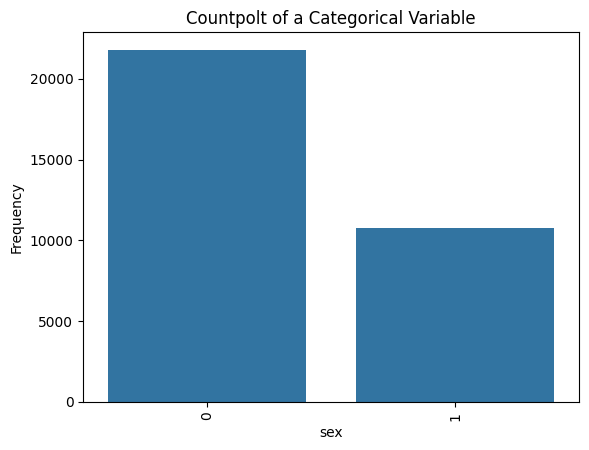

Countplot for the feature native.country


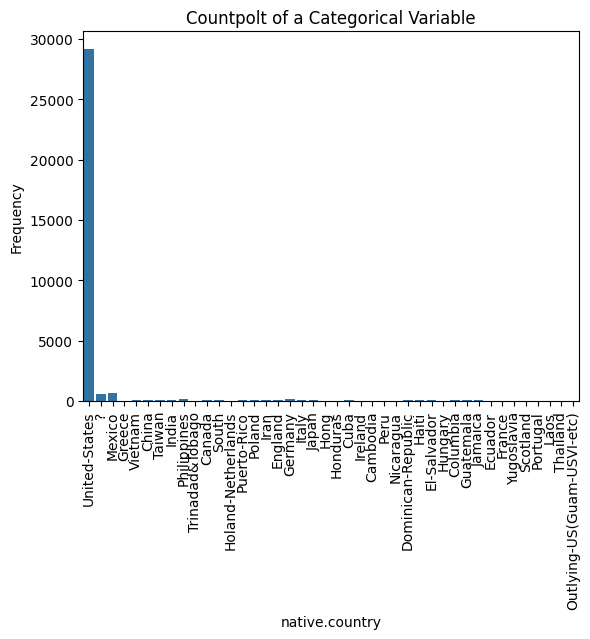

Countplot for the feature income


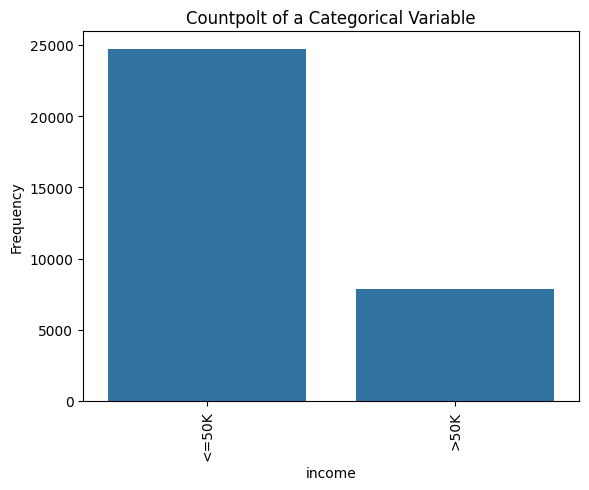

In [31]:
for col in df.select_dtypes(include='O').columns:
    catplot(data=df, feature=col)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Is there any variable which is normally distributed?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

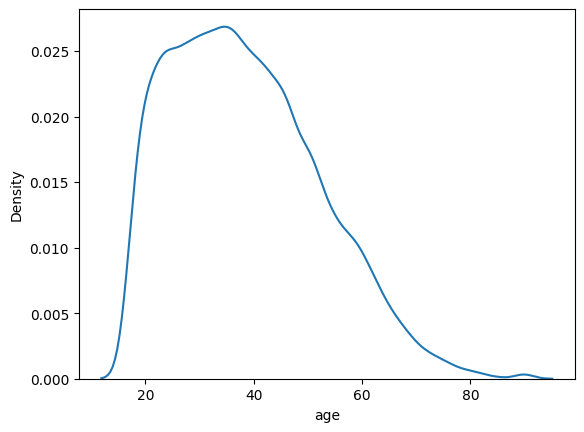

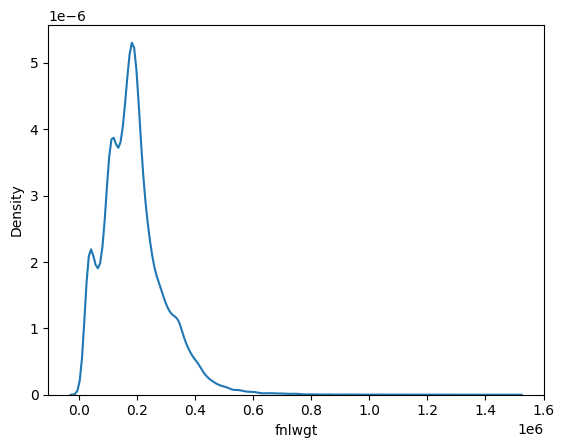

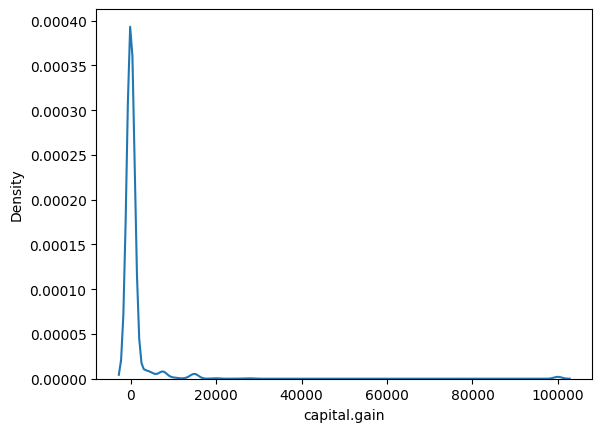

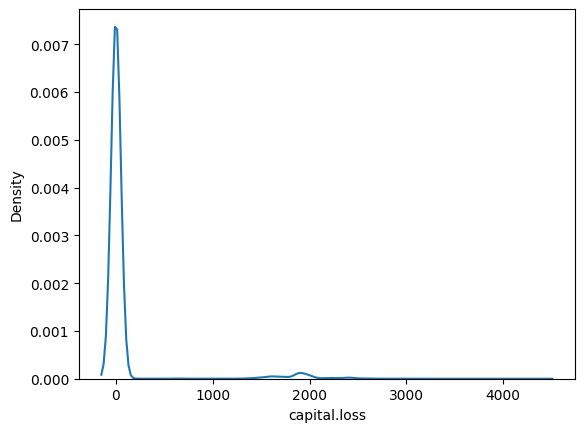

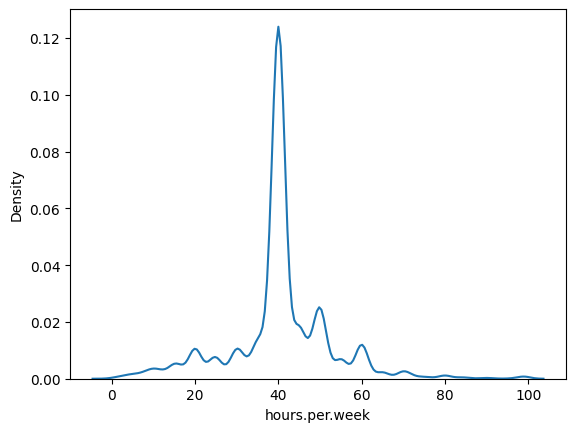

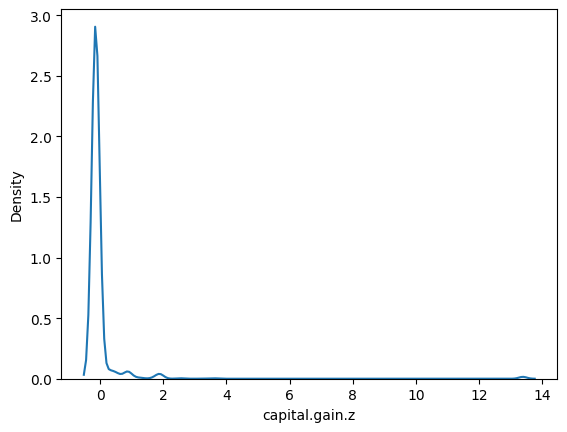

In [32]:
for col in df.select_dtypes(exclude='O').columns:
    sns.distplot(df[col], hist=False)
    plt.show()

The above density plots show that the variable 'hours.per.week' is near normally distributed.

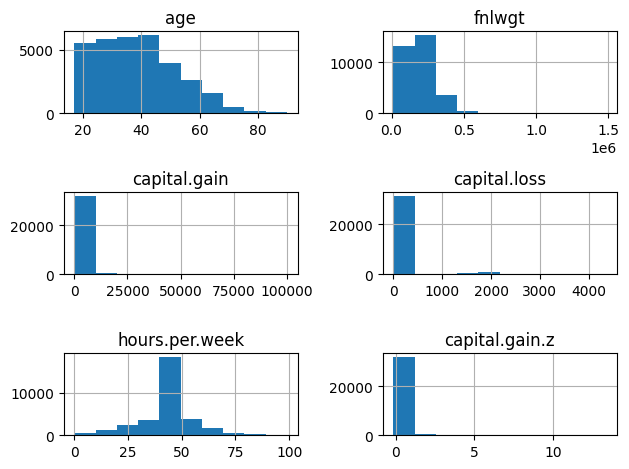

In [33]:
df.hist()
plt.tight_layout()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Identify the working class for most of the population in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
df['workclass'].mode()

0    Private
Name: workclass, dtype: object

There is a high proportion of individuals from the private sector.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. For how much time are most of the individuals working per week?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
df['hours.per.week'].mode()[0]

40

The plot shows the modal value approximately at 40 hours. That means; most of the population is working for 40 hours per week.

<a id="sk"> </a>
## 5. Skewness and kurtosis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Is there any negatively skewed feature. Support your answer with a metric and the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
for col in df.select_dtypes(exclude='O').columns:
    print(col, df[col].skew())

age 0.5587433694130483
fnlwgt 1.4469800945789828
capital.gain 11.953847687699794
capital.loss 4.594629121679696
hours.per.week 0.22224067717684567
capital.gain.z 11.953847687699785


In [37]:
df['education.num'].skew()

-0.31167586791022966

The variable 'education.num' has a negative coefficient of skewness. Let us plot the distribution of variable and check the skewness.

The plot shows the 'Education Number' is no skewness.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Find the kurtosis of all the variables, and give appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

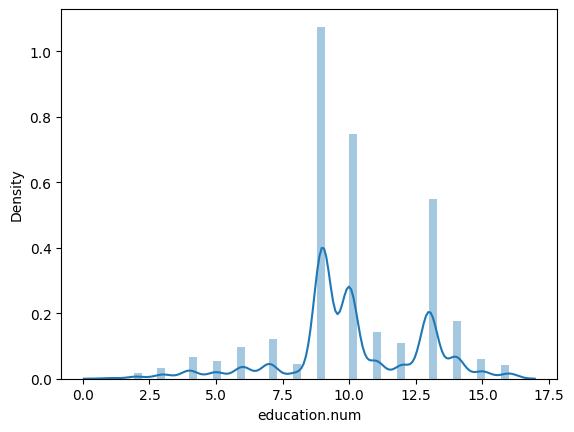

In [38]:
sns.distplot(df['education.num'])
plt.show()

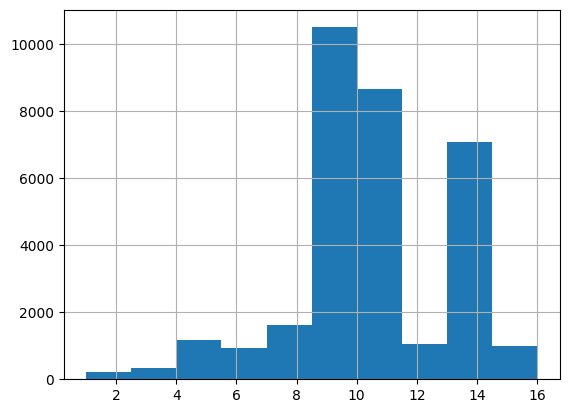

In [39]:
df['education.num'].hist()
plt.show()

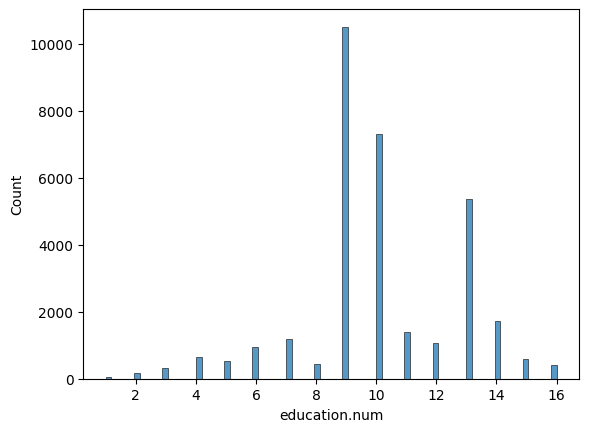

In [40]:
sns.histplot(df['education.num'])
plt.show()

In [41]:
for col in df.select_dtypes(exclude='O').columns:
    print(col, df[col].kurt())

age -0.16612745957143993
fnlwgt 6.218810978153803
capital.gain 154.7994378542533
capital.loss 20.37680171341222
hours.per.week 2.916782490794851
capital.gain.z 154.79943785425317


From the above output, 'age' is platykurtic, all the remaining variables are leptokurtic. However, the peakedness of capital gain is very high.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Identify the presence of extreme values in age using visualization techniques
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

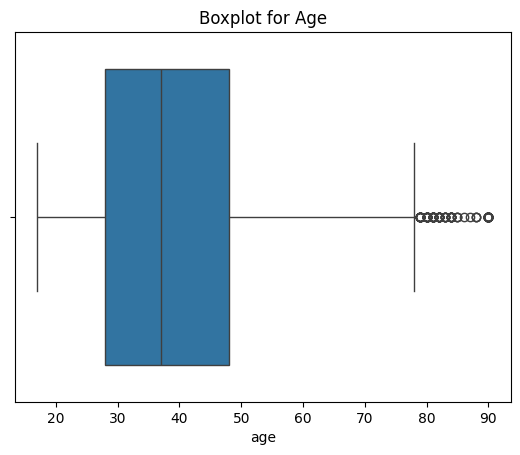

In [42]:
sns.boxplot(x=df['age'])
plt.title("Boxplot for Age")
plt.show()

The boxplot shows the presence of extreme values (outliers) above the upper whisker. Also, the median is towards the first quartile; it implies that age is positively skewed.

<a id="corr"> </a>
## 6. Correlation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Is there any effect of age on the working hours of a person?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

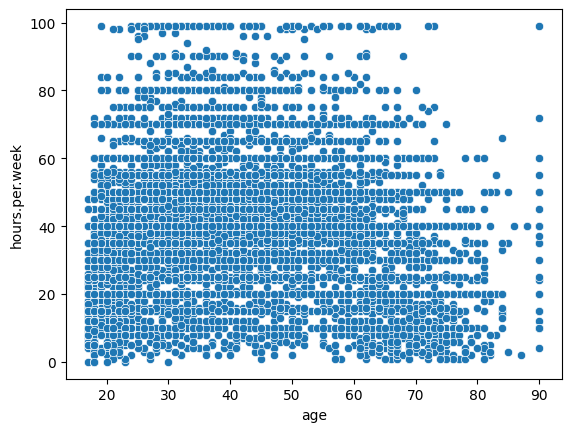

In [43]:
#Scatter plot  to see relation between age and work hours

sns.scatterplot(x=df['age'], y=df['hours.per.week'])
plt.show()

In [44]:
corr = df['age'].corr(df['hours.per.week'])
print(corr)

0.06931085288793036


# END